# EECS 545 (WN 2023) Homework 5: K-Means and GMM for Image Compression

<span class="instruction">Before starting the assignment, please fill in the following cell.</span>

In [1]:
###################################################################
# Enter your first and last name, e.g. "John Doe"                 #
# for example                                                     #
# __NAME__ = "Jongwook Choi"                                      #
# __UNIQID__ = "jwook"                                            #
###################################################################
# raise NotImplementedError("TODO: Add your implementation here.")
###################################################################
#                        END OF YOUR CODE                         #
###################################################################
__NAME__ = "Yuzhou Chen"                                      #
__UNIQID__ = "yzc"  
print(f"Your name and email: {__NAME__} <{__UNIQID__}@umich.edu>")
assert __NAME__ and __UNIQID__

Your name and email: Yuzhou Chen <yzc@umich.edu>


## Setup code

Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook. Let's start by checking whether we are using Python 3.10 or higher.

In [2]:
import sys
if sys.version_info[0] < 3:
    raise Exception("You must use Python 3")

if sys.version_info[1] < 11:
    print("Autograder will execute your code based on Python 3.11 environment. Please use Python 3.11 or higher to prevent any issues")
    print("You can create a conda environment with Python 3.11 like 'conda create --name eecs545 python=3.11'")
    raise Exception("Python 3 version is too low: {}".format(sys.version))
else:
    print("You are good to go")

You are good to go


First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
!pip install numpy matplotlib imageio

# import libraries
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imageio

# set figure size
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['font.size'] = 10
%config InlineBackend.figure_format = 'retina'

In [5]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

In [6]:
import kmeans
import gmm

# should print "Hello from ..."
kmeans.hello()
gmm.hello()

Hello from kmeans.py!
Hello from gmm.py!


## Sample Image

Out of curiosity, let's take a look at the sample image provided.

In [7]:
img_small = np.array(imageio.v3.imread('data/mandrill-small.tiff')) # 128 x 128 x 3
#plt.imshow(img_small)
img_small.shape

(128, 128, 3)

(512, 512, 3)

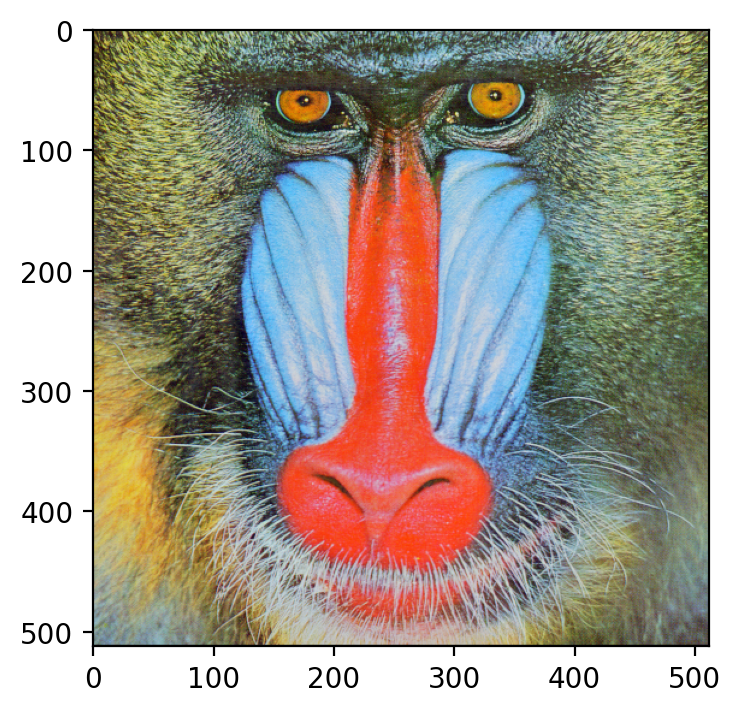

In [8]:
img_large = np.array(imageio.v3.imread('data/mandrill-large.tiff')) # 512 x 512 x 3
plt.imshow(img_large)
img_large.shape

Note that the small image becomes our training data and the large image our test data.

In [9]:
ndim = img_small.shape[-1]
train_data = img_small.reshape(-1, ndim).astype(float)
test_data = img_large.reshape(-1, ndim).astype(float)

# Part 1. K-means

<span class="instruction">Now implement `kmeans.train_kmeans()` function.</span> 

The following code runs the K-means algorithm on the provided sample image. The code will run quite fast (less than only few seconds) if your implementation is efficient enough. Especially, when it comes to computing distances, naive for loops might make the code quite slow (in which case you will lose small points); some sort of vectorization will be needed to fully pass the Autograder test cases without timeout.

In [10]:
%%time

# K-means
num_centroid = 16
initial_centroid_indices = [
    16141, 15086, 15419,  3018,  5103,  6545, 15299, 11460,
    1006,  11603, 11095,  6257, 15220, 10027, 11411, 13403,
]
initial_centroids = train_data[initial_centroid_indices, :]
centroids = kmeans.train_kmeans(train_data, initial_centroids)

CPU times: user 273 ms, sys: 55.3 ms, total: 329 ms
Wall time: 330 ms


In [11]:
# print(centroids)

## Visualization

If you implemented K-means clusetering successfully, we can visualize the result of K-means clustering (the 16 centroids) on this dataset:

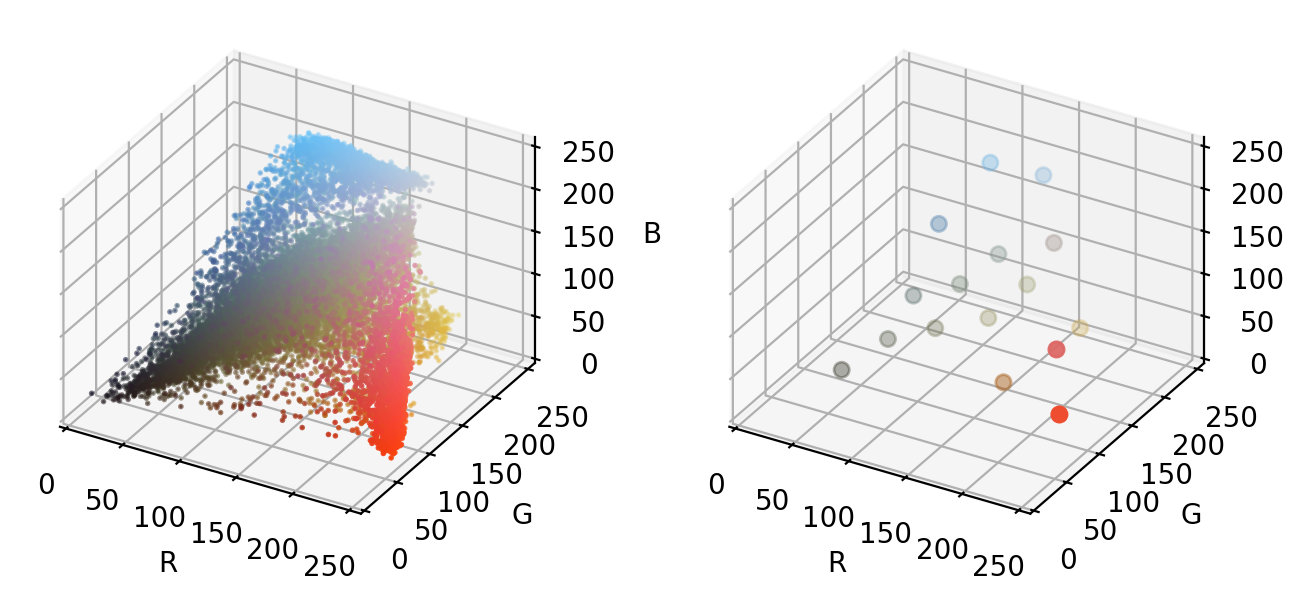

In [12]:
def visualize_3d(data, clusters):
    fig, axes = plt.subplots(1, 2, figsize=(7, 3), subplot_kw={'projection': '3d', 'proj_type': 'ortho'})

    # Data points
    axes[0].scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, :] / 255.0, s=1.0)
    axes[0].set(xlabel="R", ylabel="G", zlabel="B");
    axes[0].set(xlim=(0,255), ylim=(0,255), zlim=(0,255))
    
    # Cluster centroids
    axes[1].scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c=clusters[:, :] / 255.0, s=30)
    axes[1].set(xlabel="R", ylabel="G", zlabel="B");
    axes[1].set(xlim=(0,255), ylim=(0,255), zlim=(0,255))

    fig.tight_layout()
    return fig, axes


def animate(fig, axes):
    from IPython.display import HTML
    import matplotlib.animation

    num_frames = 50
    def animate_fn(i):
        print(f'#{i}', end='\n' if (i + 1) % 10 == 0 else ' ', flush=True)
        axes[0].view_init(30, np.linspace(-179, 179, num_frames)[i])
        axes[1].view_init(30, np.linspace(-179, 179, num_frames)[i])

    anim = matplotlib.animation.FuncAnimation(fig, animate_fn, frames=num_frames, interval=200)
    return HTML(anim.to_html5_video())


fig, axes = visualize_3d(train_data, centroids)

Or as an animation: (Warning: this is pretty slow, so feel free to skip if it's time consuming)

In [ ]:
# Feel free to skip this cell
# This may require you to install ffmpeg
# This link may be helpful https://stackoverflow.com/questions/13316397/matplotlib-animation-no-moviewriters-available
animate(fig, axes)

## Test: Compression

Now we will apply the clustering result to the test image.

<span class="instruction">Implement a function `kmeans.compress_image()`</span> which takes a RGB image and a K-means clustering result as input, and returns a compressed image by replacing each pixel with the closest cluster's centroid.

We will draw the original image (either `img_small` or `img_large`) and the compressed one side-by-side. If you implemented correctly, the images will look pretty similar.

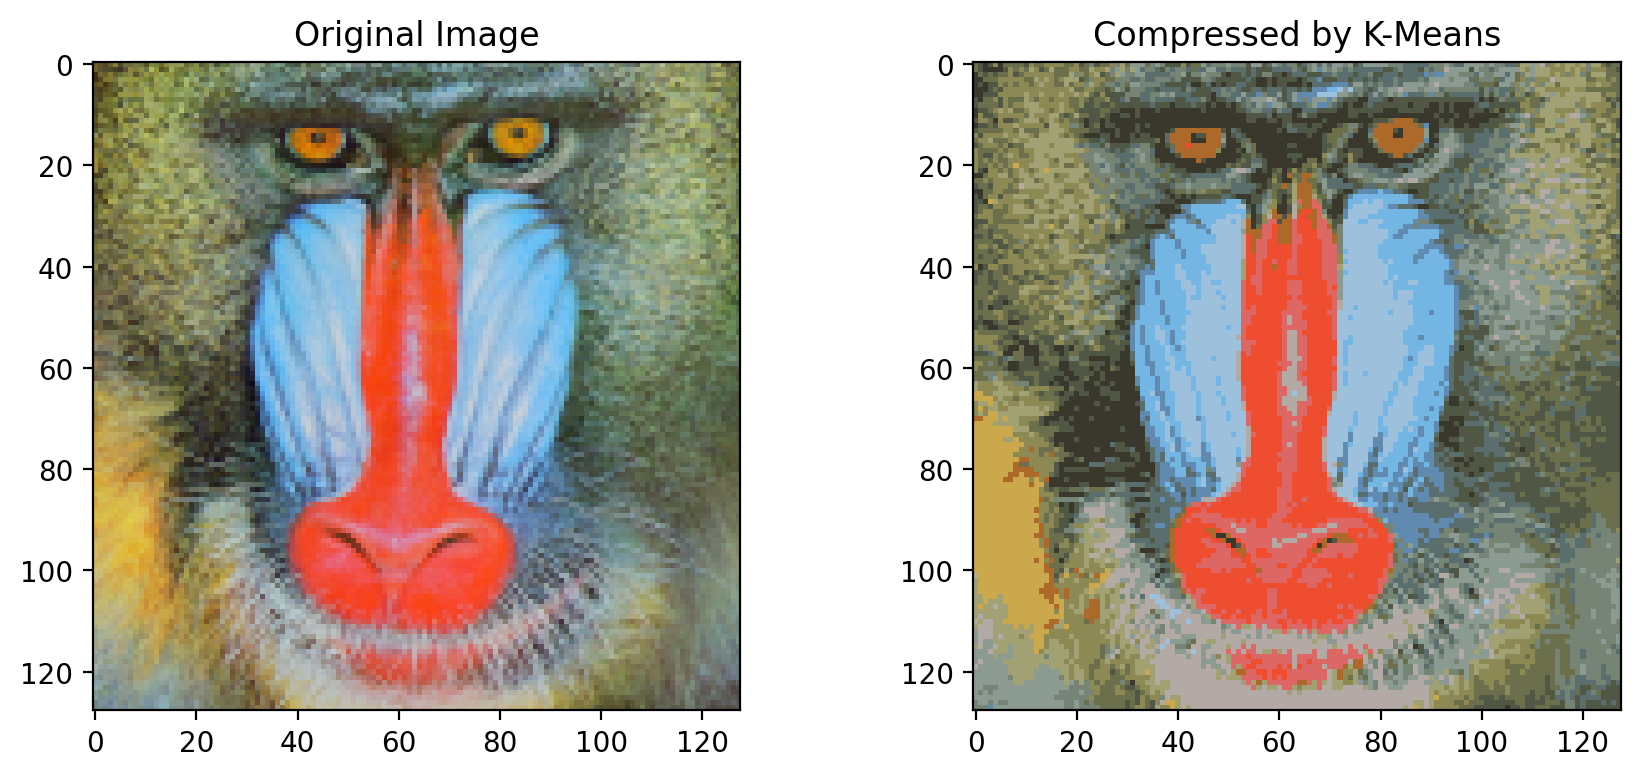

In [ ]:
img_compressed = kmeans.compress_image(img_small, centroids)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_small)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed)
axes[1].set_title("Compressed by K-Means")
fig.tight_layout()

/Users/yuzhou/anaconda3/envs/tensor/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


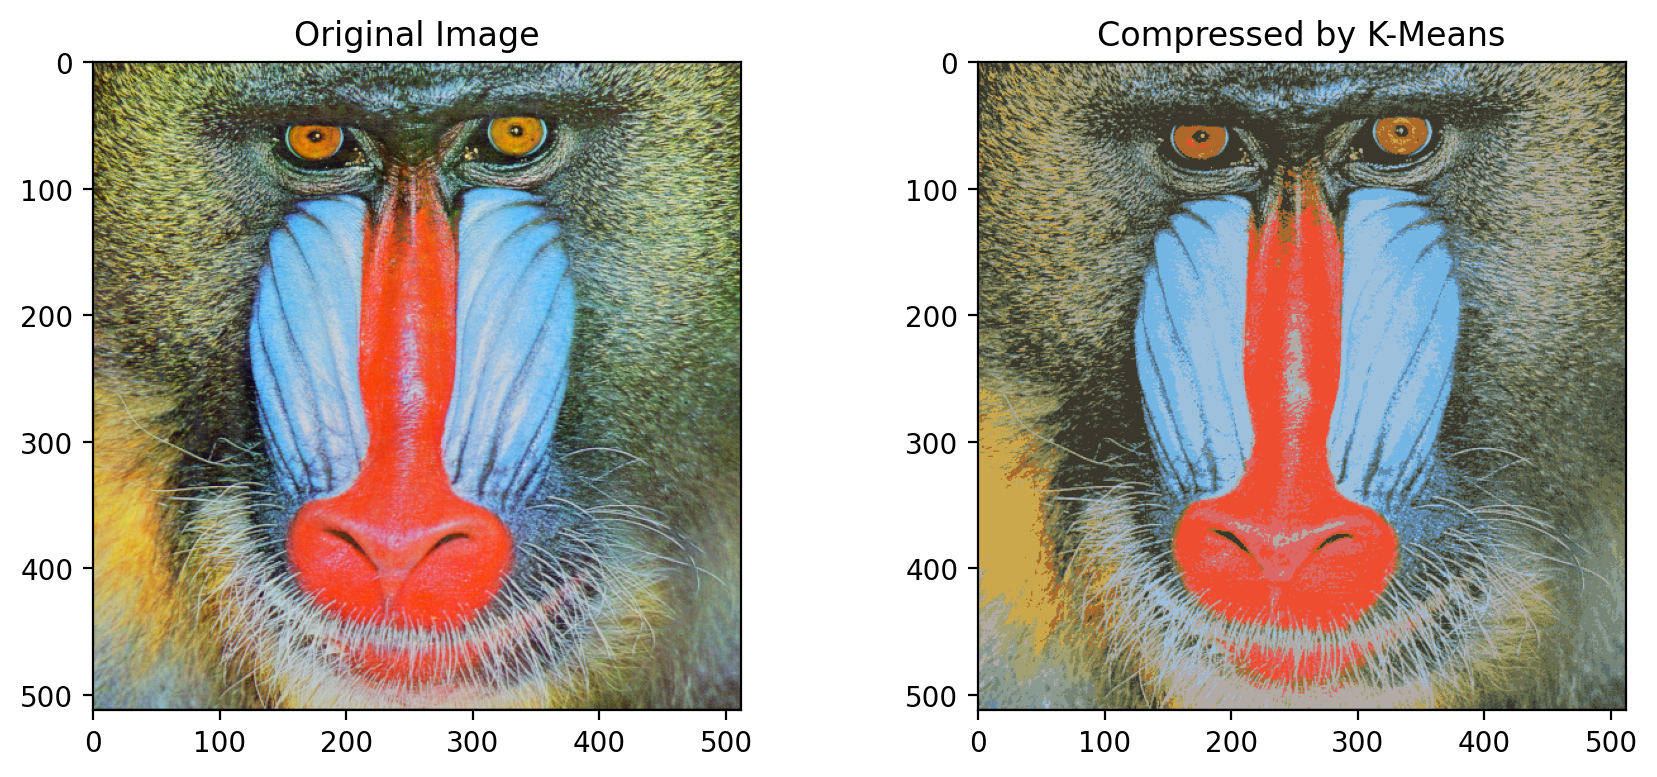

In [21]:
img_compressed = kmeans.compress_image(img_large, centroids)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_large)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed)
axes[1].set_title("Compressed by K-Means")
fig.tight_layout()

<span class="instruction">Compute and measure the (mean) pixel error.</span> Report this value to the write-up.

In [23]:

pixel_error = np.abs(img_large.astype(float) - img_compressed.astype(float))
mean_pixel_error = np.mean(pixel_error)
print("Mean pixel error:", mean_pixel_error)

Mean pixel error: 11.925828297932943


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Part 2. GMM

Now let's work on fitting GMM model with EM algorithm.

<span class="instruction">Implement gmm.train_gmm()</span>; and you can use the following code to run training on the mandrill dataset. The code should run quite fast (less than a second) if your implementation is efficient enough. Note that some sort of vectorization will be needed to fully pass the Autograder test cases without timeout.

In [15]:
# Initialize pi, mu, sigmanum_centroid = 5
initial_mu_indices = [16041, 15086, 15419,  3010,  5845]
num_mixtures = 5

init_pi = np.ones((num_mixtures)) / num_mixtures
init_mu = train_data[initial_mu_indices, :]
init_sigma = np.tile(np.identity(ndim), [num_mixtures, 1, 1]) * 1000.

gmm_model = gmm.train_gmm(train_data, init_pi, init_mu, init_sigma)
pi, mu, sigma = gmm_model

assert pi.shape == (5, )
assert mu.shape == (5, 3)
assert sigma.shape == (5, 3, 3)

You can print out the model parameters:

In [16]:
np.set_printoptions(precision=2)

print(f"{pi = }")
print(f"{mu = }")
print(f"{sigma = }")

pi = array([0.13, 0.43, 0.11, 0.21, 0.11])
mu = array([[180.22, 149.48, 116.78],
       [125.08, 136.46, 114.67],
       [233.67,  86.85,  67.54],
       [ 81.61,  89.01,  69.69],
       [140.02, 189.46, 225.51]])
sigma = array([[[ 521.36,  290.61, -210.66],
        [ 290.61, 1047.03,  842.88],
        [-210.66,  842.88, 2511.74]],

       [[ 742.09,  526.24,   40.68],
        [ 526.24,  607.66,  454.3 ],
        [  40.68,  454.3 , 1226.68]],

       [[ 129.72, -108.61, -238.98],
        [-108.61,  259.27,  460.1 ],
        [-238.98,  460.1 , 1035.17]],

       [[ 459.17,  518.45,  324.74],
        [ 518.45,  692.35,  486.85],
        [ 324.74,  486.85,  463.54]],

       [[ 612.96,  146.43,  -90.39],
        [ 146.43,   89.24,   32.62],
        [ -90.39,   32.62,   82.26]]])


## Visualization

We can reuse the visualization code. In addition, we can visualize the covariance matrix as well!

Try to see if the above parameters of a GMM agree with the plot below:

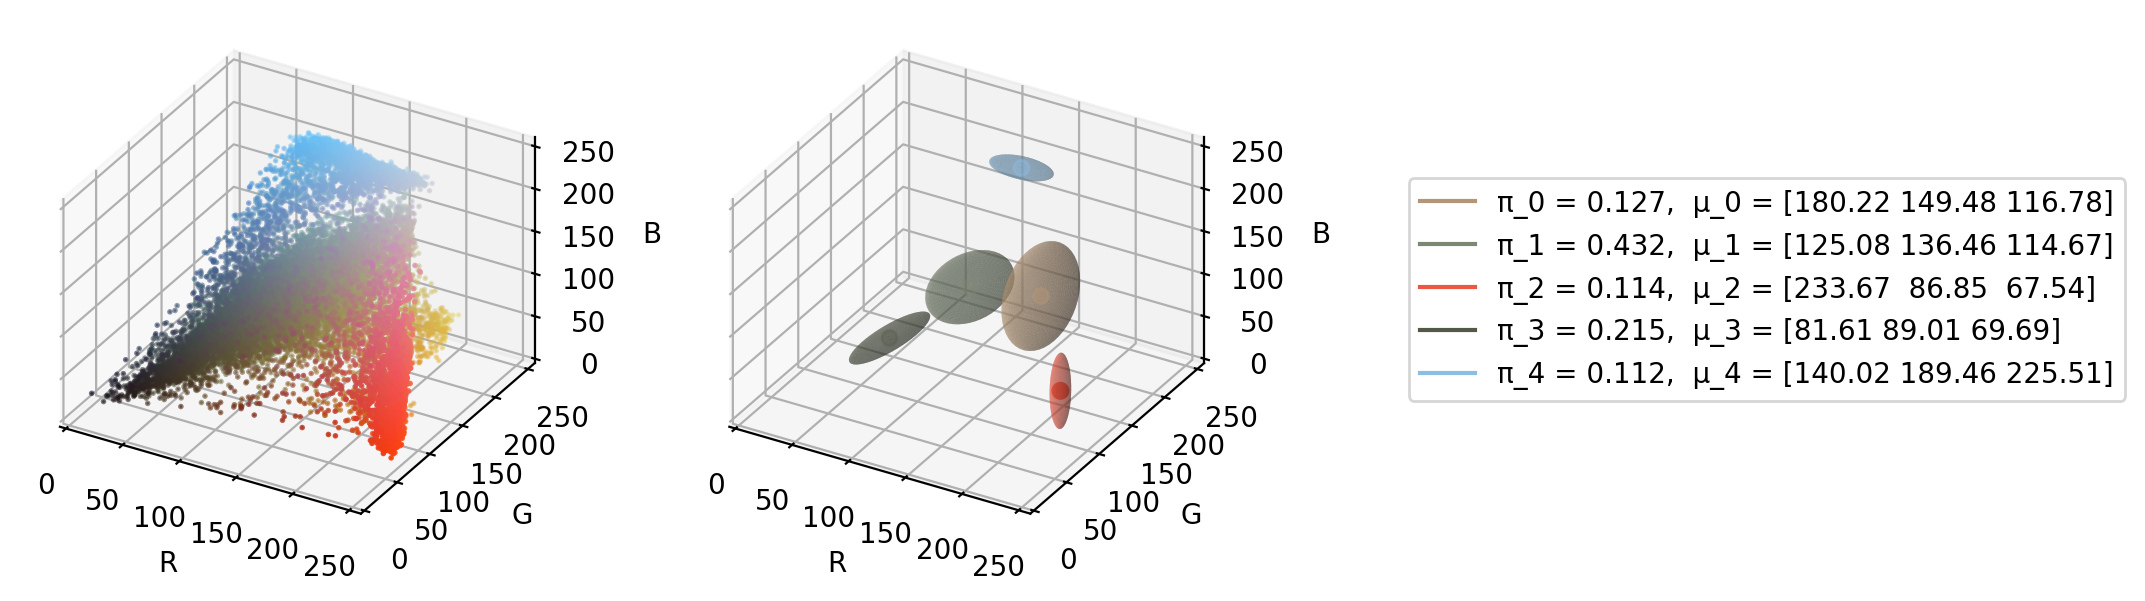

In [17]:
fig, axes = visualize_3d(train_data, mu)
fig.legend(
    [matplotlib.lines.Line2D([0], [0], color=mu_k/255.0) for mu_k in list(mu)],
    [f"π_{k} = {pi[k]:.3f},  μ_{k} = {mu[k]}" for k in range(mu.shape[0])],
    loc='center left', bbox_to_anchor=(1.05, 0.5)
)

for k in range(mu.shape[0]):
    covariance = sigma[k]
    
    # Use eigendecomposition to draw the 3D ellipsoid
    U, S, V = np.linalg.svd(covariance)
    u = np.linspace(0.0, 2.0 * np.pi, 50)
    v = np.linspace(0.0, np.pi, 50)
    # x, y, z on the principle axes with radius being sqrt{eigenvalue}
    x = (np.sqrt(S[0])) * np.outer(np.cos(u), np.sin(v))
    y = (np.sqrt(S[1])) * np.outer(np.sin(u), np.sin(v))
    z = (np.sqrt(S[2])) * np.outer(np.ones_like(u), np.cos(v))
    # Rotation
    xyz = np.stack([x, y, z], axis=2) @ U.T  # [50, 50, 3] * [3, 3]
    # Translation (centered at mu[k])
    xyz += mu[k, :][np.newaxis, np.newaxis, :]
    axes[1].plot_surface(xyz[:, :, 0], xyz[:, :, 1], xyz[:, :, 2], 
                         shade=True, alpha=0.5, color=mu[k] / 255.0)

In [ ]:
# Pretty slow again ... feel free to skip
animate(fig, axes)

## Test: Image Compression

Now we will apply the clustering result to the test image.

<span class="instruction">Implement a function `gmm.compress_image()`</span> which takes a RGB image and a K-means clustering result as input, and returns a compressed image by replacing each pixel with the mean value of the closest cluster (or with the maximum probability). Please add additional cells to compute and report the mean pixel error between the original and compressed image.

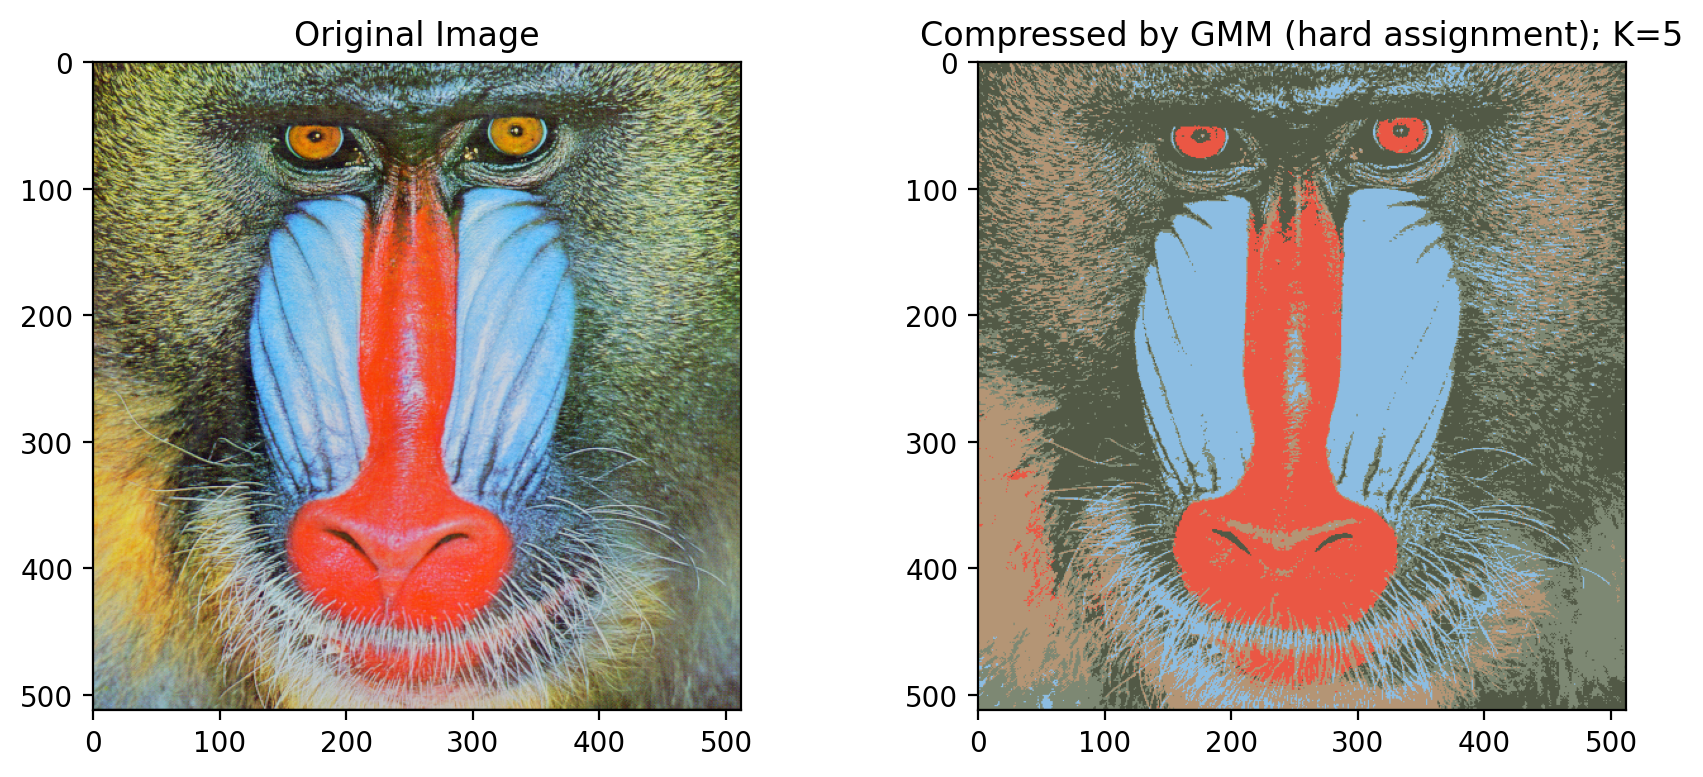

In [ ]:
img_compressed = gmm.compress_image(img_large, gmm_model)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_large)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed)
axes[1].set_title("Compressed by GMM (hard assignment); K=5")
fig.tight_layout()

### GMM with K = 16?

Let's repeat this process again with K = 16. How would you compare the result from K-means with the same number of clusters?

In [ ]:
# Initialize pi, mu, sigma (K = 16)
initial_mu_indices = np.random.RandomState(545).choice(train_data.shape[0], size=16, replace=False)

init_pi = np.ones(len(initial_mu_indices)) / num_mixtures
init_mu = train_data[initial_mu_indices, :]
init_sigma = np.tile(np.identity(ndim), [len(initial_mu_indices), 1, 1]) * 1000.

gmm_model_16 = gmm.train_gmm(train_data, init_pi, init_mu, init_sigma)

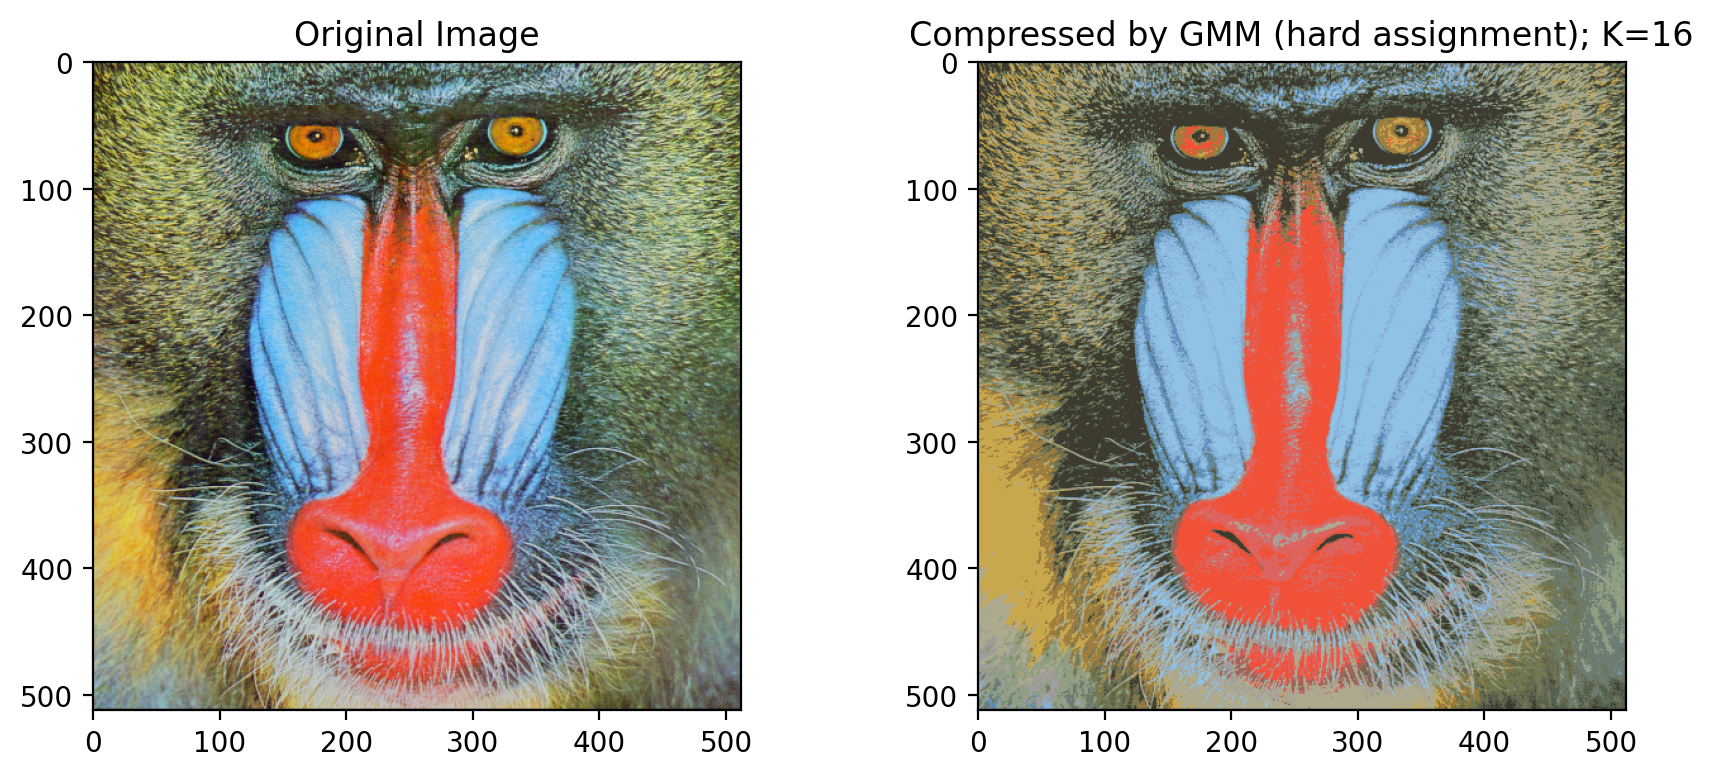

In [ ]:
img_compressed_16 = gmm.compress_image(img_large, gmm_model_16)

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].imshow(img_large)
axes[0].set_title("Original Image")

axes[1].imshow(img_compressed_16)
axes[1].set_title("Compressed by GMM (hard assignment); K=16")
fig.tight_layout()

You are now all set!